In [1]:
# Importing Numpy for creating array, Pandas for creating a tabular column and matplotlib for visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading a CSV file from the path

iris = pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
# Counting the numbers as per the Species Category

iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
# Checking for the Null Values

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Popping off the ID column as the default index is already present

iris.pop("Id")

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

In [7]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Describing the existing table to know the details

iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Describing the existing table to know the Information

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# Segregating the rest of the columns to be Feature

iris.head()
x = iris.iloc[:,:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# Segregating the last column to be the Label

y = iris.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [12]:
# Data Normalization by fitting the data and transforming it

from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(x)

In [13]:
x[0:4]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673]])

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [15]:
y_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: Species, dtype: object

In [16]:
# Fitting the training data, picking no. of neighbors and predicting using x_test values

from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 5)
knnmodel.fit(x_train, y_train)
y_predict = knnmodel.predict(x_test)
y_predict

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [17]:
# Finding the accuracy using accuracy_score library

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_predict)
acc

0.9555555555555556

In [18]:
# Using the Confusion Matrix, finding the no. of times, model got confused

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_predict)
cm1

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [19]:
# Tabular format of the Confusion Matrix

tabular_cm = pd.DataFrame(cm1, index = ["Iris-versicolor", "Iris-virginica", "Iris-setosa"], columns = ["Iris-versicolor", "Iris-virginica", "Iris-setosa"])
tabular_cm

,Iris-versicolor,Iris-virginica,Iris-setosa
Iris-versicolor,14,0,0
Iris-virginica,0,17,1
Iris-setosa,0,1,12


In [20]:
# Tabular Column of the y_test values and y_predicted values

predicted_output = pd.DataFrame(data = [y_test.values, y_predict], index = ["y_test","y_predicted"])
predicted_output

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
y_test,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,...,Iris-setosa,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-virginica,Iris-setosa,Iris-virginica,Iris-virginica,Iris-versicolor
y_predicted,Iris-setosa,Iris-versicolor,Iris-versicolor,Iris-setosa,Iris-virginica,Iris-versicolor,Iris-virginica,Iris-setosa,Iris-setosa,Iris-virginica,...,Iris-setosa,Iris-versicolor,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-virginica,Iris-setosa,Iris-versicolor,Iris-virginica,Iris-versicolor


In [21]:
predicted_output.transpose()

,y_test,y_predicted
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [22]:
# Collecting all the accuracies in array and calculating mean and maximum

ks = 21
mean_acc = np.zeros((ks - 1))

for i in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    y_pre = neigh.predict(x_test)
    mean_acc[i-1] = accuracy_score(y_pre, y_test)

In [23]:
print(mean_acc)

[0.95555556 0.95555556 0.97777778 0.95555556 0.95555556 0.97777778
 0.97777778 0.97777778 0.95555556 0.95555556 0.95555556 0.95555556
 0.95555556 0.95555556 0.95555556 0.95555556 0.93333333 0.93333333
 0.93333333 0.95555556]


In [24]:
print("The best accuracy is " ,mean_acc.max(), " with the k = ",mean_acc.argmax()+1)

The best accuracy is  0.9777777777777777  with the k =  3


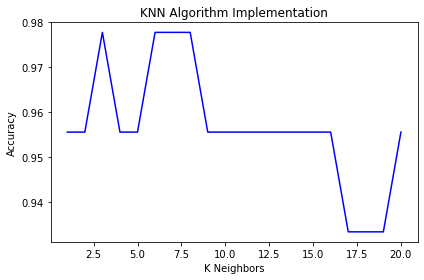

In [25]:
plt.plot(range(1,ks),mean_acc,'b')
plt.xlabel("K Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Algorithm Implementation")
plt.tight_layout()
plt.show()